In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df = pd.read_csv('Q_2.csv',names=['x','y'])

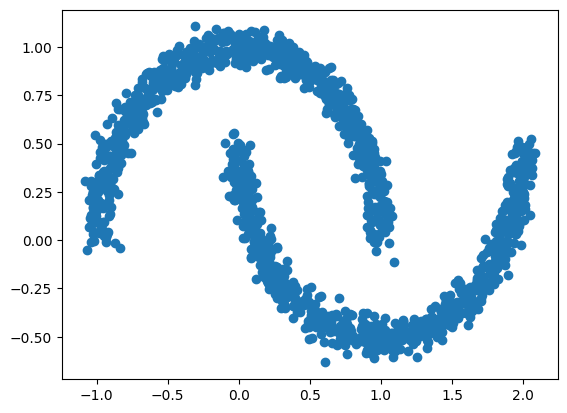

In [36]:
plt.scatter(df['x'],df['y'])
plt.show()

In [37]:
# Assuming df is your DataFrame and it has been defined earlier
# Apply DBSCAN clustering to separate two close semi-circular clusters
db = DBSCAN(eps=2, min_samples=3)  # Lowered eps and min_samples for better separation
labels = db.fit_predict(df[['x', 'y']])
df['cluster'] = labels
df.head()

,x,y,cluster
0,0.089301,-0.093581,0
1,0.119918,-0.198778,0
2,-0.848628,0.596761,0
3,0.773434,0.751316,0
4,0.126807,-0.082073,0


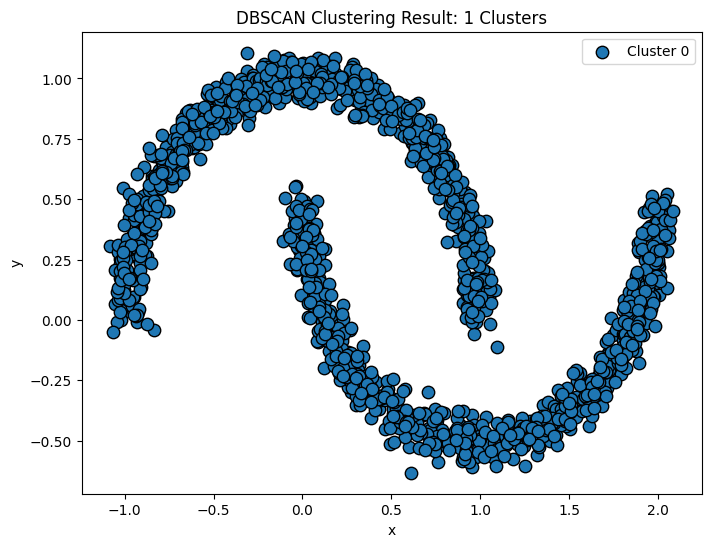

In [38]:
# Visualize the clustering result with clear distinction between two clusters and noise
plt.figure(figsize=(8,6))
unique_labels = set(labels)
n_clusters = len([k for k in unique_labels if k != -1])
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, n_clusters)]
for k, col in zip([k for k in unique_labels if k != -1], colors):
    class_member_mask = (labels == k)
    xy = df[class_member_mask]
    plt.scatter(xy['x'], xy['y'], c=[col], label=f'Cluster {k}', edgecolor='k', s=80)
# Plot noise points
noise_mask = (labels == -1)
if noise_mask.any():
    xy = df[noise_mask]
    plt.scatter(xy['x'], xy['y'], c='lightgray', label='Noise', edgecolor='k', s=80, marker='x')
plt.title(f'DBSCAN Clustering Result: {n_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()